<a href="https://colab.research.google.com/github/lowejie/Python/blob/main/Analysis_on_Malaysian_National_Population_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Analysis on Malaysian National Population Data**

The dataset selected for the project titled Population Table: States details about the Malaysian population at state level from 1970 to 2024, by sex, age group and ethnicity. The dataset is obtained from Malaysia's official open data portal: data.gov.my which has the aim of transforming Malaysia to be the number 1 data-driven country in the world. With that, here are the objectives that I have formulated for the project:

*   To perform exploratory data analysis (EDA) on Malaysia's national population data to gain insights about the various factors influencing population growth/decline.
*   To determine the trend of Malaysia population affected by socioeconomic factors like age, sex and ethnicity.
*   To identify the differences in elderly population and young population of Malaysia and their changes over the years..

Tools and technologies that will be used in this project include:

*   Google Colaboratory using Python 3
*   Python 3 libraries including NumPy, Matplotlib, Seaborn visualisation.









Import the modules required:

*   Pandas
*   Matplotlib
*   Seaborn





In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Population Table: Malaysia dataset is obtained from the official open data portal which is data.gov.my. The dataset contains information about the Malaysian population at national level from 1970 to 2024, segregated into sex, age group and ethnicity columns.

In [3]:
URL_DATA = 'https://storage.dosm.gov.my/population/population_malaysia.parquet'

pop_df = pd.read_parquet(URL_DATA)
if 'date' in pop_df.columns: pop_df['date'] = pd.to_datetime(pop_df['date'])

pop_df

,date,sex,age,ethnicity,population
0,1970-01-01,both,overall,overall,10881.8
1,1970-01-01,both,0-4,overall,1702.4
2,1970-01-01,both,5-9,overall,1690.3
3,1970-01-01,both,10-14,overall,1454.7
4,1970-01-01,both,15-19,overall,1197.6
...,...,...,...,...,...
17011,2024-01-01,male,85+,bumi_other,10.0
17012,2024-01-01,male,85+,chinese,14.9
17013,2024-01-01,male,85+,indian,4.4
17014,2024-01-01,male,85+,other_citizen,0.6


Insights from initial observation:

*   Dataset contains population count in thousands for each state from 1970 till 2024, grouped by sex, age and ethnicity.
*   Sex is categorised by male, female and combination of both.
*   Age is categorised by ranges like 0-4, 5-9 up till 85+ as well as combination of all of the age ranges
*   Ethnicity is categorised by bumi, chinese, indian, others and combination of all of them. Bumi and others group are further divided into bumi malay and bumi others as well as other citizen and other non-citizen respectively.





In [4]:
pop_df.columns

Index(['date', 'sex', 'age', 'ethnicity', 'population'], dtype='object')

In [5]:
pop_df.shape

(17016, 5)

No null values are present within the dataset

In [6]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17016 entries, 0 to 17015
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        17016 non-null  datetime64[ns]
 1   sex         17016 non-null  object        
 2   age         17016 non-null  object        
 3   ethnicity   17016 non-null  object        
 4   population  17016 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 664.8+ KB


Describe() does not detail anything informative as data of distinct groups are confined within one column.

In [7]:
pop_df.describe()

,date,population
count,17016,17016.000000
mean,2002-08-23 07:52:58.561354112,542.242096
min,1970-01-01 00:00:00,0.200000
25%,1993-01-01 00:00:00,24.200000
50%,2003-01-01 00:00:00,111.250000
75%,2014-01-01 00:00:00,390.650000
max,2024-01-01 00:00:00,34058.800000
std,NaN,1863.186659


## Data Preparation and Cleaning

Check if there is any null value within the dataset. 0 null values observed.

In [8]:
pop_df.isnull().sum()

,0
date,0
sex,0
age,0
ethnicity,0
population,0


Check if there are any duplicate rows within dataset. None observed.

In [9]:
pop_df.duplicated().sum()

0

Ten random samples (rows) of data are observed.

In [10]:
pop_df.sample(10)

,date,sex,age,ethnicity,population
6723,1999-01-01,both,50-54,indian,62.2
14936,2019-01-01,male,25-29,other_noncitizen,431.7
2148,1986-01-01,both,40-44,indian,57.0
14073,2017-01-01,female,75-79,indian,11.2
12679,2014-01-01,both,30-34,chinese,526.0
6879,1999-01-01,female,65-69,other_noncitizen,3.7
16627,2024-01-01,both,0-4,chinese,246.0
1904,1985-01-01,both,65-69,other,3.6
4730,1994-01-01,both,50-54,other_noncitizen,19.8
9864,2007-01-01,both,15-19,bumi_other,339.0


Year, month and day column are added to the dataset for easier processing using datetime values.

In [11]:
pop_df['year'] = pd.DatetimeIndex(pop_df['date']).year
pop_df['month'] = pd.DatetimeIndex(pop_df['date']).month
pop_df['day'] = pd.DatetimeIndex(pop_df['date']).day

pop_df

,date,sex,age,ethnicity,population,year,month,day
0,1970-01-01,both,overall,overall,10881.8,1970,1,1
1,1970-01-01,both,0-4,overall,1702.4,1970,1,1
2,1970-01-01,both,5-9,overall,1690.3,1970,1,1
3,1970-01-01,both,10-14,overall,1454.7,1970,1,1
4,1970-01-01,both,15-19,overall,1197.6,1970,1,1
...,...,...,...,...,...,...,...,...
17011,2024-01-01,male,85+,bumi_other,10.0,2024,1,1
17012,2024-01-01,male,85+,chinese,14.9,2024,1,1
17013,2024-01-01,male,85+,indian,4.4,2024,1,1
17014,2024-01-01,male,85+,other_citizen,0.6,2024,1,1


Initially there are 18 age ranges exluding 'overall' present within the 'age' column which are of intervals of 5 apart (eg. 0-4, 5-9 etc). As there are too many ranges to keep track on, I plan to group them into 4 major ranges: 0-14, 15-24, 25-59 and 60+ to represent human life stages like Children, Youth, Adults and Elderly which are more appropriate categorisations for Malaysian context.

A function assign_age_range is defined to convert string age range into integers by taking lower limit of the initial age range and parse into conditionals that segregate them into newly_defined ranges.

In [12]:
def reassign_age_range(age_range):

  if age_range == 'overall':
    return 'overall'

  lower_age = int(age_range.split('-')[0]) if '-' in age_range else int(age_range[:-1])

  if 0 <= lower_age <= 14:
      return '0-14'
  elif 15 <= lower_age <= 24:
      return '15-24'
  elif 25 <= lower_age <= 59:
      return '25-59'
  elif lower_age >= 60:
      return '60+'
  else:
      return 'Unknown'

Bumi which stands for bumiputera refers to the natives residing in the Peninsular Malaysia which include Malays, Sabah and Sarawak natives, Islamic Chinese and Indians by marriage and so on. Intially both bumi and other ethnicity groups are differentiated into bumi_malay and non malays as well as other including minority ethnicities that are citizen and non citizens. To visualise the whole Malaysian context, I believe it is best to regroup them into 3 main groups, namely bumi (Malays), chinese and indian along with minority ethnicities represented by 'other' and separated out non-citizens as its own category.

In [13]:
def regroup_ethnicity(race):

  if race == 'bumi_malay':
      return 'bumi'
  elif race == 'bumi_other':
      return 'bumi'
  elif race == 'other_citizen':
      return 'other'
  elif race == 'other_noncitizen':
      return 'non-citizen'
  else:
    return race

The regrouping functions are defined and applied to the age and ethnicity columns.

In [14]:
pop_df['age'] = pop_df['age'].apply(reassign_age_range)

pop_df = pop_df[~((pop_df['year'] > 1990) & (pop_df['ethnicity'].isin(['bumi', 'other'])))]

pop_df['ethnicity'] = pop_df['ethnicity'].apply(regroup_ethnicity)

pop_df

,date,sex,age,ethnicity,population,year,month,day
0,1970-01-01,both,overall,overall,10881.8,1970,1,1
1,1970-01-01,both,0-14,overall,1702.4,1970,1,1
2,1970-01-01,both,0-14,overall,1690.3,1970,1,1
3,1970-01-01,both,0-14,overall,1454.7,1970,1,1
4,1970-01-01,both,15-24,overall,1197.6,1970,1,1
...,...,...,...,...,...,...,...,...
17011,2024-01-01,male,60+,bumi,10.0,2024,1,1
17012,2024-01-01,male,60+,chinese,14.9,2024,1,1
17013,2024-01-01,male,60+,indian,4.4,2024,1,1
17014,2024-01-01,male,60+,other,0.6,2024,1,1


All rows containg values like 'both' and 'overall' for sex, age and ethnicity columns are filtered and removed due to redundancy. A dataframe containing year and population columns is created for later use.

In [15]:
pop_df_overall = pop_df[((pop_df['sex'] == 'both') & (pop_df['age'] == 'overall') & (pop_df['ethnicity'] == 'overall'))]

pop_df_overall.drop(columns=['sex','age','ethnicity'], inplace=True)

pop_df_yearly = pop_df_overall[['year','population']]

pop_df_yearly.reset_index(drop=True, inplace=True)

pop_df_yearly.head()

<ipython-input-15-04603c9ce513>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df_overall.drop(columns=['sex','age','ethnicity'], inplace=True)


,year,population
0,1970,10881.8
1,1971,11159.7
2,1972,11441.3
3,1973,11719.8
4,1974,12001.3


Values like both and overall for sex and ethnicity columns respectively are filtered before dropping the columns, producing a dataframe containing various age groups that are data for both sex and overall ethnicity. Overall values for age is dropped to produce the dataframe with year, age and population columns.

In [16]:
pop_df_overall_excp_age = pop_df[((pop_df['sex'] == 'both') & (pop_df['ethnicity'] == 'overall'))]

pop_df_overall_excp_age.drop(columns=['sex','ethnicity'], inplace=True)

pop_df_overall_excp_age = pop_df_overall_excp_age[~((pop_df['age'] == 'overall'))]

pop_df_yearly_age = pop_df_overall_excp_age[['year','age','population']]

pop_df_yearly_age

<ipython-input-16-9d6d250ab71e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df_overall_excp_age.drop(columns=['sex','ethnicity'], inplace=True)
<ipython-input-16-9d6d250ab71e>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pop_df_overall_excp_age = pop_df_overall_excp_age[~((pop_df['age'] == 'overall'))]


,year,age,population
1,1970,0-14,1702.4
2,1970,0-14,1690.3
3,1970,0-14,1454.7
4,1970,15-24,1197.6
5,1970,15-24,921.6
...,...,...,...
16715,2024,60+,1051.3
16722,2024,60+,750.4
16729,2024,60+,446.8
16736,2024,60+,215.1


From the previous dataframe, age more than 60 which defines age group elderly is used to filter and the sum of all rows for each year is performed to obtain a dataframe with total elderly population for each year.

In [17]:
pop_df_yearly_elder = pop_df_yearly_age[(pop_df_yearly_age['age'] == '60+')]

pop_df_yearly_elder = pop_df_yearly_elder.groupby('year')['population'].sum().reset_index()

pop_df_yearly_elder['elder_pop'] = pop_df_yearly_elder['population']

pop_df_yearly_elder.drop(columns=['population'], inplace=True)

pop_df_yearly_elder.head()

,year,elder_pop
0,1970,591.6
1,1971,612.4
2,1972,626.7
3,1973,644.6
4,1974,663.1


Similar, the same is done to produce yearly total young population which is defined by age from 0 to 14.

In [18]:
pop_df_yearly_young = pop_df_yearly_age[(pop_df_yearly_age['age'] == '0-14')]

pop_df_yearly_young = pop_df_yearly_young.groupby('year')['population'].sum().reset_index()

pop_df_yearly_young['young_pop'] = pop_df_yearly_young['population']

pop_df_yearly_young.drop(columns=['population'], inplace=True)

pop_df_yearly_young.head()

,year,young_pop
0,1970,4847.4
1,1971,4907.0
2,1972,4975.1
3,1973,5037.5
4,1974,5100.4


Two of the dataframes above are merged and new columns depicting elderly to total ratio and young to total ratio are created to form a new dataframe for further analysis.

In [19]:
pop_df_yearly_total_elder = pop_df_yearly.merge(pop_df_yearly_elder, on='year')

pop_df_yearly_total_elderyoung = pop_df_yearly_total_elder.merge(pop_df_yearly_young, on='year')

pop_df_yearly_total_elderyoung['elder_total_ratio (%)'] = round(((pop_df_yearly_total_elderyoung['elder_pop'] / pop_df_yearly_total_elderyoung['population']) * 100), 2)

pop_df_yearly_total_elderyoung['young_total_ratio (%)'] = round(((pop_df_yearly_total_elderyoung['young_pop'] / pop_df_yearly_total_elderyoung['population']) * 100), 2)

pop_df_yearly_total_elderyoung.head()

,year,population,elder_pop,young_pop,elder_total_ratio (%),young_total_ratio (%)
0,1970,10881.8,591.6,4847.4,5.44,44.55
1,1971,11159.7,612.4,4907.0,5.49,43.97
2,1972,11441.3,626.7,4975.1,5.48,43.48
3,1973,11719.8,644.6,5037.5,5.50,42.98
4,1974,12001.3,663.1,5100.4,5.53,42.50


Dataframe containing sex information is filtered by selecting only overall values for age and ethnicity. 'Both' value is dropped from sex column to produce dataframe with year, sex and population.

In [20]:
pop_df_sex = pop_df[((pop_df['age'] == 'overall') & (pop_df['ethnicity'] == 'overall'))]

pop_df_sex.drop(columns=['age','ethnicity'], inplace=True)

pop_df_sex = pop_df_sex[~((pop_df['sex'] == 'both'))]

pop_df_yearly_sex = pop_df_sex[['year','sex','population']]

pop_df_yearly_sex.reset_index(drop=True, inplace=True)

pop_df_yearly_sex.head()

<ipython-input-20-678899903166>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df_sex.drop(columns=['age','ethnicity'], inplace=True)
<ipython-input-20-678899903166>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pop_df_sex = pop_df_sex[~((pop_df['sex'] == 'both'))]


,year,sex,population
0,1970,female,5364.7
1,1970,male,5517.0
2,1971,female,5506.3
3,1971,male,5653.4
4,1972,female,5649.8


Pivot method is used to convert the values under sex into columns for further analysis later.

In [21]:
pop_df_yearly_sex_pivot = pop_df_yearly_sex.pivot(index='year', columns='sex', values='population')

pop_df_yearly_sex_pivot.reset_index(inplace=True)

pop_df_yearly_sex_pivot.head()

sex,year,female,male
0,1970,5364.7,5517.0
1,1971,5506.3,5653.4
2,1972,5649.8,5791.5
3,1973,5791.9,5927.9
4,1974,5935.0,6066.3


Similar processing methods are used to create yearly population data containing sex information for elderly, except that only ethnicity column containing 'overall' value is filtered as age column is needed to filter out data whose age is more than 60 later.

In [22]:
pop_df_sex_elder = pop_df[((pop_df['ethnicity'] == 'overall'))]

pop_df_sex_elder.drop(columns=['ethnicity'], inplace=True)

pop_df_sex_elder = pop_df_sex_elder[~((pop_df_sex_elder['sex'] == 'both') | (pop_df_sex_elder['age'] == 'overall'))]

pop_df_yearly_sex = pop_df_sex_elder[['year','sex','age','population']]

pop_df_yearly_sex.head()

<ipython-input-22-cfb5f0693918>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df_sex_elder.drop(columns=['ethnicity'], inplace=True)


,year,sex,age,population
17,1970,female,0-14,833.1
18,1970,female,0-14,826.6
19,1970,female,0-14,714.6
20,1970,female,15-24,599.8
21,1970,female,15-24,461.2


Aggregating of data with age more than 60 is perform using sum function and pivoting is performed to convert values of sex into columns. New column names for elderly are also created to depict their intended values.

In [23]:
pop_df_yearly_sex_elder = pop_df_yearly_sex[pop_df_yearly_sex['age'] == '60+']

pop_df_yearly_sex_elder = pop_df_yearly_sex_elder.groupby(['year','sex'])['population'].sum().reset_index()

pop_df_yearly_sex_elder_pivot = pop_df_yearly_sex_elder.pivot(index='year', columns='sex', values='population')

pop_df_yearly_sex_elder_pivot.reset_index(inplace=True)

pop_df_yearly_sex_elder_pivot[['elder_female','elder_male']] = pop_df_yearly_sex_elder_pivot[['female','male']]

pop_df_yearly_sex_elder_pivot.drop(columns=['female','male'], inplace=True)

pop_df_yearly_sex_elder_pivot.head()

sex,year,elder_female,elder_male
0,1970,283.5,308.0
1,1971,294.7,317.8
2,1972,302.6,324.1
3,1973,312.6,332.0
4,1974,323.2,340.0


Similar method to create of elderly yearly population by sex is used to create the version for young population by sex.

In [24]:
pop_df_yearly_sex_young = pop_df_yearly_sex[pop_df_yearly_sex['age'] == '0-14']

pop_df_yearly_sex_young = pop_df_yearly_sex_young.groupby(['year','sex'])['population'].sum().reset_index()

pop_df_yearly_sex_young_pivot = pop_df_yearly_sex_young.pivot(index='year', columns='sex', values='population')

pop_df_yearly_sex_young_pivot.reset_index(inplace=True)

pop_df_yearly_sex_young_pivot[['young_female','young_male']] = pop_df_yearly_sex_young_pivot[['female','male']]

pop_df_yearly_sex_young_pivot.drop(columns=['female','male'], inplace=True)

pop_df_yearly_sex_young_pivot.head()

sex,year,young_female,young_male
0,1970,2374.3,2473.1
1,1971,2406.9,2500.1
2,1972,2443.0,2532.1
3,1973,2475.4,2562.2
4,1974,2506.6,2593.8


Both dataframes are combined into one single dataframe for ease of analysis.

In [25]:
pop_df_yearly_sex_total_elder = pop_df_yearly_sex_pivot.merge(pop_df_yearly_sex_elder_pivot, on='year')

pop_df_yearly_sex_total_elderyoung = pop_df_yearly_sex_total_elder.merge(pop_df_yearly_sex_young_pivot, on='year')

pop_df_yearly_sex_total_elderyoung.head()

sex,year,female,male,elder_female,elder_male,young_female,young_male
0,1970,5364.7,5517.0,283.5,308.0,2374.3,2473.1
1,1971,5506.3,5653.4,294.7,317.8,2406.9,2500.1
2,1972,5649.8,5791.5,302.6,324.1,2443.0,2532.1
3,1973,5791.9,5927.9,312.6,332.0,2475.4,2562.2
4,1974,5935.0,6066.3,323.2,340.0,2506.6,2593.8


Elderly to total ratios and young to total ratios are added into the dataframe to observe the increase/decrease in elderly or young population over the years.

In [26]:
pop_df_yearly_sex_total_elderyoung['elder_female_ratio (%)'] = round(((pop_df_yearly_sex_total_elderyoung['elder_female'] / pop_df_yearly_sex_total_elderyoung['female']) * 100), 2)

pop_df_yearly_sex_total_elderyoung['elder_male_ratio (%)'] = round(((pop_df_yearly_sex_total_elderyoung['elder_male'] / pop_df_yearly_sex_total_elderyoung['male']) * 100), 2)

pop_df_yearly_sex_total_elderyoung['young_female_ratio (%)'] = round(((pop_df_yearly_sex_total_elderyoung['young_female'] / pop_df_yearly_sex_total_elderyoung['female']) * 100), 2)

pop_df_yearly_sex_total_elderyoung['young_male_ratio (%)'] = round(((pop_df_yearly_sex_total_elderyoung['young_male'] / pop_df_yearly_sex_total_elderyoung['male']) * 100), 2)

pop_df_yearly_sex_total_elderyoung.head()

sex,year,female,male,elder_female,elder_male,young_female,young_male,elder_female_ratio (%),elder_male_ratio (%),young_female_ratio (%),young_male_ratio (%)
0,1970,5364.7,5517.0,283.5,308.0,2374.3,2473.1,5.28,5.58,44.26,44.83
1,1971,5506.3,5653.4,294.7,317.8,2406.9,2500.1,5.35,5.62,43.71,44.22
2,1972,5649.8,5791.5,302.6,324.1,2443.0,2532.1,5.36,5.60,43.24,43.72
3,1973,5791.9,5927.9,312.6,332.0,2475.4,2562.2,5.40,5.60,42.74,43.22
4,1974,5935.0,6066.3,323.2,340.0,2506.6,2593.8,5.45,5.60,42.23,42.76


For dataframe focusing on ethnicity, age and sex column containing 'overall' and 'both' values are filtered out first before dropping their columns. 'overall' is removed from ethnicity and index is reset to produce a new dataframe for yearly population by ethnicity.

In [27]:
pop_df_race = pop_df[((pop_df['age'] == 'overall') & (pop_df['sex'] == 'both'))]

pop_df_race.drop(columns=['age','sex'], inplace=True)

pop_df_race = pop_df_race[~((pop_df['ethnicity'] == 'overall'))]

pop_df_yearly_race = pop_df_race[['year','ethnicity','population']]

pop_df_yearly_race.reset_index(drop=True, inplace=True)

pop_df_yearly_race.head()

<ipython-input-27-1c391f8a14ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df_race.drop(columns=['age','sex'], inplace=True)
<ipython-input-27-1c391f8a14ea>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pop_df_race = pop_df_race[~((pop_df['ethnicity'] == 'overall'))]


,year,ethnicity,population
0,1980,bumi,7926.7
1,1980,chinese,4460.1
2,1980,indian,1189.8
3,1980,other,302.7
4,1981,bumi,8200.6


To aggregate any individual rows, pivot_table is used and NaN values present in non-citizen columns are replaced with 0s.

In [28]:
pop_df_yearly_race_pivot = pop_df_yearly_race.pivot_table(
    index='year',
    columns='ethnicity',
    values='population',
    aggfunc='sum'
)

pop_df_yearly_race_pivot.reset_index(inplace=True)

pop_df_yearly_race_pivot = pop_df_yearly_race_pivot.replace({np.nan: 0, None: 0})

pop_df_yearly_race_pivot.head()

ethnicity,year,bumi,chinese,indian,non-citizen,other
0,1980,7926.7,4460.1,1189.8,0.0,302.7
1,1981,8200.6,4521.1,1212.7,0.0,322.5
2,1982,8489.3,4581.6,1236.6,0.0,343.5
3,1983,8786.6,4637.7,1259.0,0.0,364.9
4,1984,9093.3,4690.6,1279.9,0.0,386.6


To create the ethnicity dataframe for elderly, 'both' for sex column is filtered before dropping. Values which are 'overall' for ethnicity and age are removed to reduce redundancy. Age range of over 60 is filtered to form a new dataframe.

In [29]:
pop_df_race_elder = pop_df[((pop_df['sex'] == 'both'))]

pop_df_race_elder.drop(columns=['sex'], inplace=True)

pop_df_race_elder = pop_df_race_elder[~((pop_df_race_elder['ethnicity'] == 'overall') | (pop_df_race_elder['age'] == 'overall'))]

pop_df_yearly_race = pop_df_race_elder[['year','age','ethnicity','population']]

pop_df_yearly_race_elder = pop_df_yearly_race[pop_df_yearly_race['age'] == '60+']

pop_df_yearly_race_elder = pop_df_yearly_race_elder.groupby(['year','ethnicity'])['population'].sum().reset_index()

pop_df_yearly_race_elder.head()

<ipython-input-29-a27b9a5d0cd6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df_race_elder.drop(columns=['sex'], inplace=True)


,year,ethnicity,population
0,1980,bumi,379.8
1,1980,chinese,311.7
2,1980,indian,60.1
3,1980,other,8.1
4,1981,bumi,397.9


Pivot_table is used again to aggregate any individual rows before replacing NaN with 0s for non-citizen columns. Renaming of column names is done for elderly for clarity.

In [30]:
pop_df_yearly_race_elder_pivot = pop_df_yearly_race_elder.pivot_table(
    index='year',
    columns='ethnicity',
    values='population',
    aggfunc='sum'
)

pop_df_yearly_race_elder_pivot.reset_index(inplace=True)

pop_df_yearly_race_elder_pivot = pop_df_yearly_race_elder_pivot.replace({np.nan: 0, None: 0})

pop_df_yearly_race_elder_pivot[['bumi_elder','chi_elder','ind_elder','non-citi_elder','otr_elder']] = pop_df_yearly_race_elder_pivot[['bumi','chinese','indian','non-citizen','other']]

pop_df_yearly_race_elder_pivot.drop(columns=['bumi','chinese','indian','non-citizen','other'], inplace=True)

pop_df_yearly_race_elder_pivot.head()

ethnicity,year,bumi_elder,chi_elder,ind_elder,non-citi_elder,otr_elder
0,1980,379.8,311.7,60.1,0.0,8.1
1,1981,397.9,315.5,62.3,0.0,8.8
2,1982,416.9,319.5,64.3,0.0,9.3
3,1983,434.9,322.5,65.8,0.0,9.9
4,1984,452.9,325.9,67.3,0.0,10.6


Similar, to create the dataframe focusing on young with age range of 0 to 14, it is filtered accordingly.

In [31]:
pop_df_yearly_race_young = pop_df_yearly_race[pop_df_yearly_race['age'] == '0-14']

pop_df_yearly_race_young = pop_df_yearly_race_young.groupby(['year','ethnicity'])['population'].sum().reset_index()

pop_df_yearly_race_young.head()

,year,ethnicity,population
0,1980,bumi,3294.9
1,1980,chinese,1672.6
2,1980,indian,449.1
3,1980,other,125.9
4,1981,bumi,3382.9


Also, the yearly population for young by ethnicity is produced similarly to the elderly dataframe.

In [32]:
pop_df_yearly_race_young_pivot = pop_df_yearly_race_young.pivot_table(
    index='year',
    columns='ethnicity',
    values='population',
    aggfunc='sum'
)

pop_df_yearly_race_young_pivot.reset_index(inplace=True)

pop_df_yearly_race_young_pivot = pop_df_yearly_race_young_pivot.replace({np.nan: 0, None: 0})

pop_df_yearly_race_young_pivot[['bumi_young','chi_young','ind_young','non-citi_young','otr_young']] = pop_df_yearly_race_young_pivot[['bumi','chinese','indian','non-citizen','other']]

pop_df_yearly_race_young_pivot.drop(columns=['bumi','chinese','indian','non-citizen','other'], inplace=True)

pop_df_yearly_race_young_pivot.head()

ethnicity,year,bumi_young,chi_young,ind_young,non-citi_young,otr_young
0,1980,3294.9,1672.6,449.1,0.0,125.9
1,1981,3382.9,1655.4,450.6,0.0,133.0
2,1982,3488.6,1642.7,454.4,0.0,138.2
3,1983,3588.5,1630.3,457.7,0.0,142.2
4,1984,3701.2,1623.9,462.4,0.0,146.5


Ultimately, the three dataframes are merged together to form a dataframe for ease of analysis.

In [33]:
pop_df_yearly_race_total_elder = pop_df_yearly_race_pivot.merge(pop_df_yearly_race_elder_pivot, on='year')

pop_df_yearly_race_total_elderyoung = pop_df_yearly_race_total_elder.merge(pop_df_yearly_race_young_pivot, on='year')

pop_df_yearly_race_total_elderyoung.head()

ethnicity,year,bumi,chinese,indian,non-citizen,other,bumi_elder,chi_elder,ind_elder,non-citi_elder,otr_elder,bumi_young,chi_young,ind_young,non-citi_young,otr_young
0,1980,7926.7,4460.1,1189.8,0.0,302.7,379.8,311.7,60.1,0.0,8.1,3294.9,1672.6,449.1,0.0,125.9
1,1981,8200.6,4521.1,1212.7,0.0,322.5,397.9,315.5,62.3,0.0,8.8,3382.9,1655.4,450.6,0.0,133.0
2,1982,8489.3,4581.6,1236.6,0.0,343.5,416.9,319.5,64.3,0.0,9.3,3488.6,1642.7,454.4,0.0,138.2
3,1983,8786.6,4637.7,1259.0,0.0,364.9,434.9,322.5,65.8,0.0,9.9,3588.5,1630.3,457.7,0.0,142.2
4,1984,9093.3,4690.6,1279.9,0.0,386.6,452.9,325.9,67.3,0.0,10.6,3701.2,1623.9,462.4,0.0,146.5


Elderly to total ratios and young to total ratios are added as new columns to the dataframe for further analysis.

In [34]:
pop_df_yearly_race_total_elderyoung['elder_bumi_ratio (%)'] = round(((pop_df_yearly_race_total_elderyoung['bumi_elder'] / pop_df_yearly_race_total_elderyoung['bumi']) * 100), 2)

pop_df_yearly_race_total_elderyoung['elder_chi_ratio (%)'] = round(((pop_df_yearly_race_total_elderyoung['chi_elder'] / pop_df_yearly_race_total_elderyoung['chinese']) * 100), 2)

pop_df_yearly_race_total_elderyoung['elder_ind_ratio (%)'] = round(((pop_df_yearly_race_total_elderyoung['ind_elder'] / pop_df_yearly_race_total_elderyoung['indian']) * 100), 2)

pop_df_yearly_race_total_elderyoung['elder_other_ratio (%)'] = round(((pop_df_yearly_race_total_elderyoung['otr_elder'] / pop_df_yearly_race_total_elderyoung['other']) * 100), 2)

pop_df_yearly_race_total_elderyoung['young_bumi_ratio (%)'] = round(((pop_df_yearly_race_total_elderyoung['bumi_young'] / pop_df_yearly_race_total_elderyoung['bumi']) * 100), 2)

pop_df_yearly_race_total_elderyoung['young_chi_ratio (%)'] = round(((pop_df_yearly_race_total_elderyoung['chi_young'] / pop_df_yearly_race_total_elderyoung['chinese']) * 100), 2)

pop_df_yearly_race_total_elderyoung['young_ind_ratio (%)'] = round(((pop_df_yearly_race_total_elderyoung['ind_young'] / pop_df_yearly_race_total_elderyoung['indian']) * 100), 2)

pop_df_yearly_race_total_elderyoung['young_other_ratio (%)'] = round(((pop_df_yearly_race_total_elderyoung['otr_young'] / pop_df_yearly_race_total_elderyoung['other']) * 100), 2)

pop_df_yearly_race_total_elderyoung.head()

ethnicity,year,bumi,chinese,indian,non-citizen,other,bumi_elder,chi_elder,ind_elder,non-citi_elder,...,non-citi_young,otr_young,elder_bumi_ratio (%),elder_chi_ratio (%),elder_ind_ratio (%),elder_other_ratio (%),young_bumi_ratio (%),young_chi_ratio (%),young_ind_ratio (%),young_other_ratio (%)
0,1980,7926.7,4460.1,1189.8,0.0,302.7,379.8,311.7,60.1,0.0,...,0.0,125.9,4.79,6.99,5.05,2.68,41.57,37.50,37.75,41.59
1,1981,8200.6,4521.1,1212.7,0.0,322.5,397.9,315.5,62.3,0.0,...,0.0,133.0,4.85,6.98,5.14,2.73,41.25,36.61,37.16,41.24
2,1982,8489.3,4581.6,1236.6,0.0,343.5,416.9,319.5,64.3,0.0,...,0.0,138.2,4.91,6.97,5.20,2.71,41.09,35.85,36.75,40.23
3,1983,8786.6,4637.7,1259.0,0.0,364.9,434.9,322.5,65.8,0.0,...,0.0,142.2,4.95,6.95,5.23,2.71,40.84,35.15,36.35,38.97
4,1984,9093.3,4690.6,1279.9,0.0,386.6,452.9,325.9,67.3,0.0,...,0.0,146.5,4.98,6.95,5.26,2.74,40.70,34.62,36.13,37.89


## Exploratory Analysis and Visualisation

Describe() method is used to learn about the summary statistics of the dataframes produced: total vs elderly vs young dataframe and two other similar dataframes but segregated by sex and ethnicity.

In [35]:
pop_df_yearly_total_elderyoung.describe()

,year,population,elder_pop,young_pop,elder_total_ratio (%),young_total_ratio (%)
count,55.00000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,1997.00000,22076.449091,1654.745455,6931.952727,6.948545,33.615455
std,16.02082,7448.575401,985.895668,1103.809554,1.855625,6.748078
min,1970.00000,10881.800000,591.600000,4847.400000,5.440000,22.180000
25%,1983.50000,15249.300000,844.950000,5876.300000,5.560000,27.085000
50%,1997.00000,21769.300000,1298.200000,7566.100000,5.960000,35.230000
75%,2010.50000,28825.300000,2301.950000,7782.600000,7.985000,38.540000
max,2024.00000,34058.800000,3949.900000,8097.500000,11.600000,44.550000


In [36]:
pop_df_yearly_sex_total_elderyoung.describe()

sex,year,female,male,elder_female,elder_male,young_female,young_male,elder_female_ratio (%),elder_male_ratio (%),young_female_ratio (%),young_male_ratio (%)
count,55.00000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,1997.00000,10761.667273,11314.765455,846.812727,807.936364,3374.981818,3556.967273,7.278000,6.635818,33.428545,33.800182
std,16.02082,3517.015949,3933.030083,502.506180,483.631324,526.369731,577.487257,2.038237,1.700470,6.508710,6.979633
min,1970.00000,5364.700000,5517.000000,283.500000,308.000000,2374.300000,2473.100000,5.280000,5.240000,22.640000,21.770000
25%,1983.50000,7543.850000,7705.400000,434.300000,410.700000,2870.550000,3005.850000,5.760000,5.395000,27.215000,26.960000
50%,1997.00000,10687.300000,11081.900000,681.800000,616.400000,3669.400000,3892.300000,6.380000,5.620000,34.900000,35.550000
75%,2010.50000,13970.050000,14855.250000,1171.000000,1130.950000,3782.850000,4002.350000,8.380000,7.610000,38.055000,39.010000
max,2024.00000,16176.100000,17882.700000,2016.100000,1933.600000,3931.700000,4165.700000,12.460000,10.810000,44.260000,44.830000


In [37]:
pop_df_yearly_race_total_elderyoung.describe()

ethnicity,year,bumi,chinese,indian,non-citizen,other,bumi_elder,chi_elder,ind_elder,non-citi_elder,...,non-citi_young,otr_young,elder_bumi_ratio (%),elder_chi_ratio (%),elder_ind_ratio (%),elder_other_ratio (%),young_bumi_ratio (%),young_chi_ratio (%),young_ind_ratio (%),young_other_ratio (%)
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000,45.000000,45.000000
mean,2002.000000,14906.417778,5807.060000,1687.335556,1583.495556,293.306667,1050.960000,625.744444,129.824444,52.691111,...,211.273333,114.035556,6.591111,10.357111,7.346889,4.932000,35.24200,26.564000,29.276889,39.177778
std,13.133926,4212.515280,800.790675,281.492642,1159.887417,79.775655,574.930305,278.496356,65.548747,47.362393,...,141.314415,29.026423,1.808493,3.334385,2.644532,2.016136,5.61274,5.927108,5.919070,6.311960
min,1980.000000,7926.700000,4460.100000,1189.800000,0.000000,194.700000,379.800000,311.700000,60.100000,0.000000,...,0.000000,48.200000,4.790000,6.940000,5.050000,2.680000,24.89000,17.190000,19.260000,22.360000
25%,1991.000000,11178.600000,5020.900000,1408.700000,803.000000,241.900000,577.400000,362.900000,77.000000,21.700000,...,154.500000,105.500000,5.190000,7.230000,5.390000,4.440000,30.29000,21.360000,23.740000,37.890000
50%,2002.000000,14994.100000,5923.100000,1748.400000,1600.400000,276.600000,870.900000,549.900000,101.700000,43.200000,...,237.200000,114.500000,5.810000,9.280000,5.820000,4.680000,36.85000,26.710000,30.430000,40.850000
75%,2013.000000,18549.100000,6554.400000,1965.200000,2548.300000,299.700000,1424.300000,886.400000,178.400000,77.100000,...,294.800000,121.200000,7.680000,13.520000,9.080000,4.940000,40.62000,31.670000,34.860000,43.240000
max,2024.000000,21568.800000,6892.400000,2014.800000,3396.100000,525.200000,2364.000000,1128.700000,267.100000,188.800000,...,525.500000,174.800000,10.960000,16.850000,13.320000,10.230000,41.57000,37.500000,37.750000,46.210000


Seaborn visualisation style is set to a standard for all plots produced.

In [38]:
sns.set_style('darkgrid')

# Total Population by Age Group

*  People with age range 15-24 and 25-59 have the highest count in total population of Malaysia.
*   Elderly depicted by age range of over 60 is the least among them.



Text(0, 0.5, 'Population')

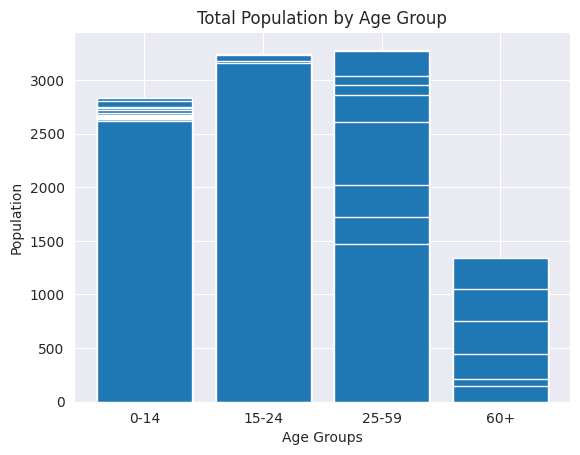

In [39]:
plt.title("Total Population by Age Group")
plt.bar(pop_df_yearly_age['age'], pop_df_yearly_age['population']);

plt.xlabel('Age Groups')
plt.ylabel('Population')

# Total Population by Sex

*   Overall, there are more males than females present in Malaysia



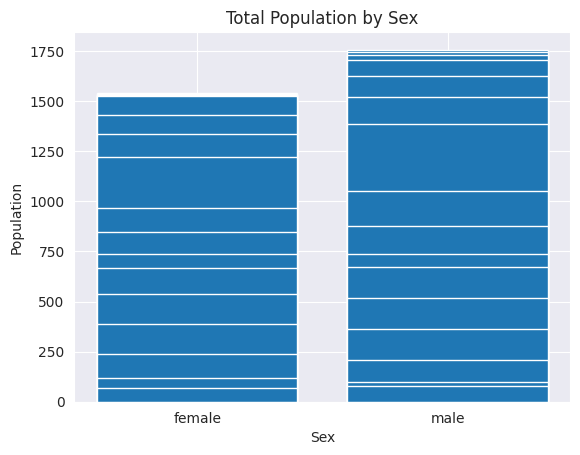

In [40]:
plt.title("Total Population by Sex")
plt.bar(pop_df_yearly_sex['sex'], pop_df_yearly_sex['population']);

plt.xlabel('Sex')
plt.ylabel('Population');

# Male and Female Population Distribution by Age Group and Sex

*   The median for each age group is similar between male and females, with male higher than females for all age groups except for elderly with age range of over 60.



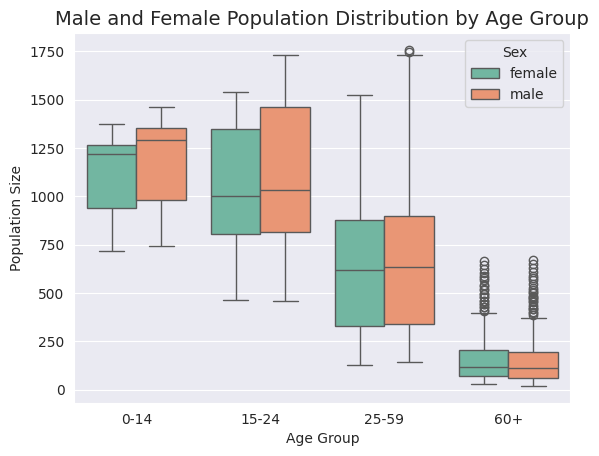

In [41]:
sns.boxplot(x="age", y="population", hue='sex', data=pop_df_yearly_sex, palette="Set2")

plt.title("Male and Female Population Distribution by Age Group", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Population Size")
plt.legend(title="Sex")

# Total Population by Ethnicity

*   The ethnicity with the highest population is bumiputera, followed up by non-citizens, chinese, indian and other.



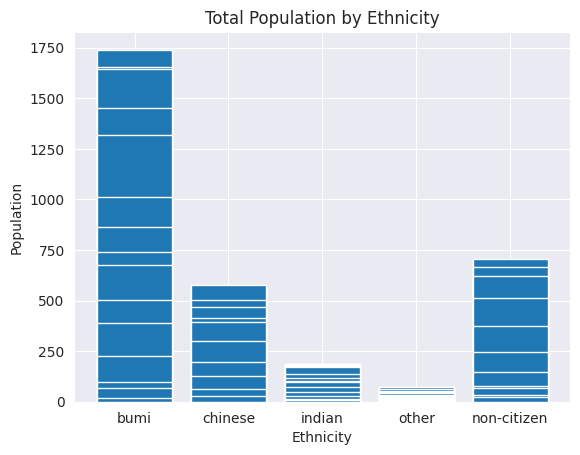

In [42]:
plt.title("Total Population by Ethnicity")
plt.bar(pop_df_yearly_race['ethnicity'], pop_df_yearly_race['population']);

plt.xlabel('Ethnicity')
plt.ylabel('Population');

# Different Ethnicity Population Distribution by Age Group

*  Overall, bumiputera has the widest span of ranges for population followed up by non-citizens, chinese, indian and other.



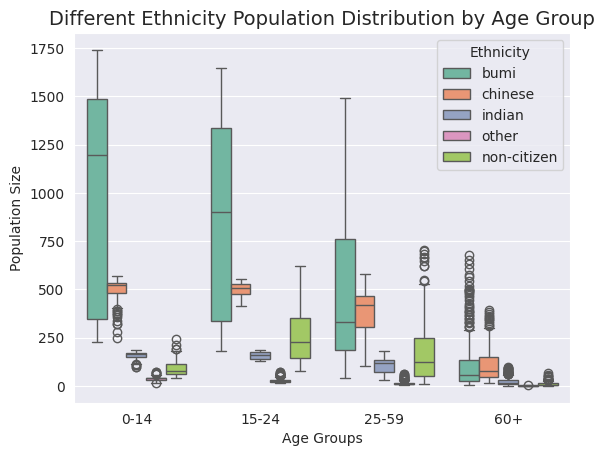

In [43]:
sns.boxplot(x="age", y="population", hue='ethnicity', data=pop_df_yearly_race, palette="Set2")

plt.title("Different Ethnicity Population Distribution by Age Group", fontsize=14)
plt.xlabel("Age Groups")
plt.ylabel("Population Size")
plt.legend(title="Ethnicity")

# Total Elderly Population by Sex

*   There are more female than male elderlys in Malaysia.



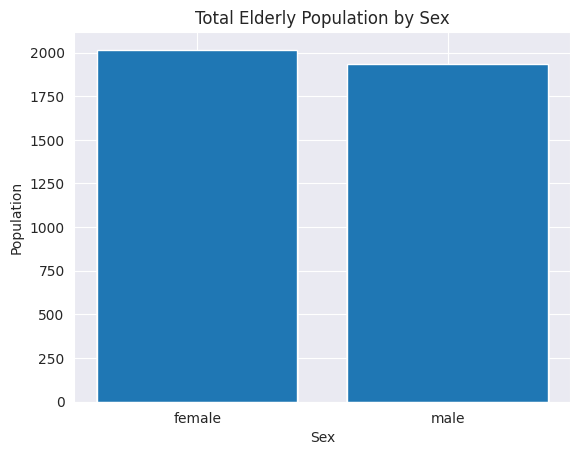

In [44]:
plt.bar(pop_df_yearly_sex_elder['sex'], pop_df_yearly_sex_elder['population'])
plt.title("Total Elderly Population by Sex")

plt.xlabel('Sex')
plt.ylabel('Population');

# Total Elderly Population by Ethnicity

*   There are more elderly bumiputeras than chinese, indian, other and non-citizen combined.



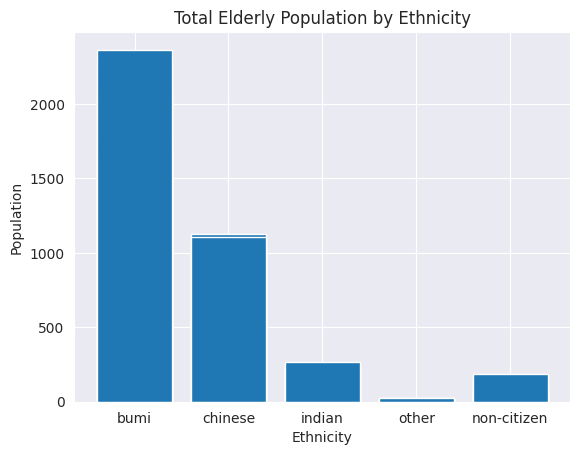

In [45]:
plt.bar(pop_df_yearly_race_elder['ethnicity'], pop_df_yearly_race_elder['population'])
plt.title("Total Elderly Population by Ethnicity")

plt.xlabel('Ethnicity')
plt.ylabel('Population');

## Total vs Elder vs Young population

*   Malaysia's national population has more than doubled for the past 50+ years.
*   Although the elderly population does not have drastic changes, it has been steadily increasing over the last 20 years.
*   Around 2000, it is observed that there has been a slight decline in young population aged 0 to 14.





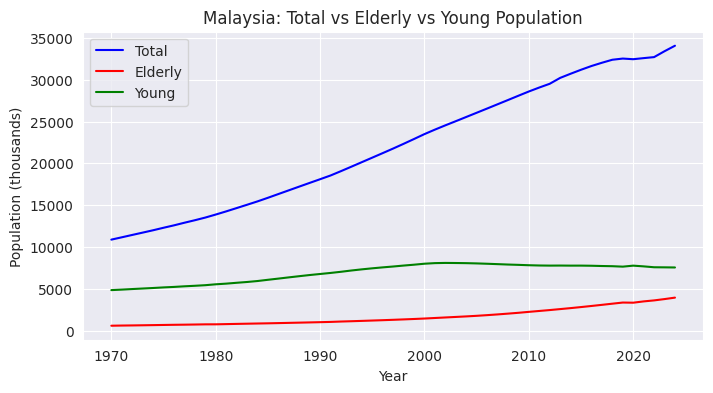

In [46]:
plt.figure(figsize=(8, 4))
plt.plot(pop_df_yearly_total_elderyoung['year'], pop_df_yearly_total_elderyoung['population'], color = 'blue')
plt.plot(pop_df_yearly_total_elderyoung['year'], pop_df_yearly_total_elderyoung['elder_pop'], color = 'red')
plt.plot(pop_df_yearly_total_elderyoung['year'], pop_df_yearly_total_elderyoung['young_pop'], color = 'green')
plt.xlabel('Year')
plt.ylabel('Population (thousands)')

plt.title("Malaysia: Total vs Elderly vs Young Population")
plt.legend(['Total', 'Elderly','Young']);

Text(0.5, 1.0, 'Malaysia: Elderly vs. Young Population')

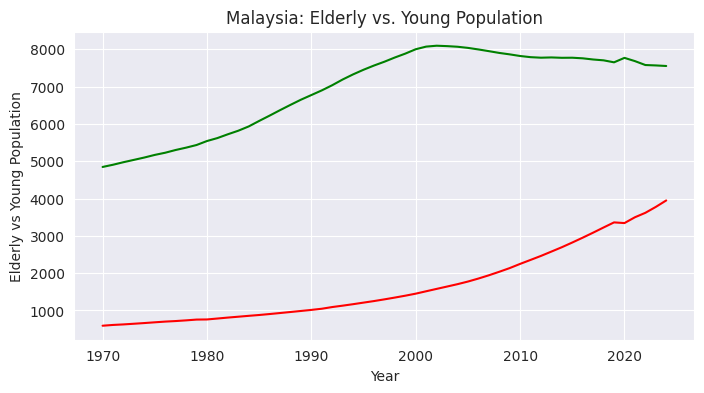

In [47]:
plt.figure(figsize=(8, 4))
plt.plot(pop_df_yearly_total_elderyoung['year'], pop_df_yearly_total_elderyoung['elder_pop'], color = 'red')
plt.plot(pop_df_yearly_total_elderyoung['year'], pop_df_yearly_total_elderyoung['young_pop'], color = 'green')

plt.xlabel('Year')
plt.ylabel('Elderly vs Young Population')

plt.title("Malaysia: Elderly vs. Young Population")

It is observed that the population of young (aged 0 to 14) is steadily declining while elderly population has steadily increased over the years.

<BarContainer object of 55 artists>

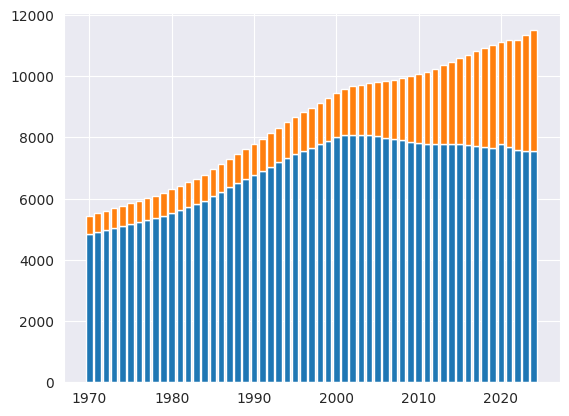

In [48]:
plt.bar(pop_df_yearly_total_elderyoung['year'], pop_df_yearly_total_elderyoung['young_pop'])
plt.bar(pop_df_yearly_total_elderyoung['year'], pop_df_yearly_total_elderyoung['elder_pop'], bottom=pop_df_yearly_total_elderyoung['young_pop'])

It can be seen that male and female population remain similar in the past. Male population has increased over the years and has surpassed female population by a few million by 2024. Population count between elderly male and female as well as young male and female are similar among each other.

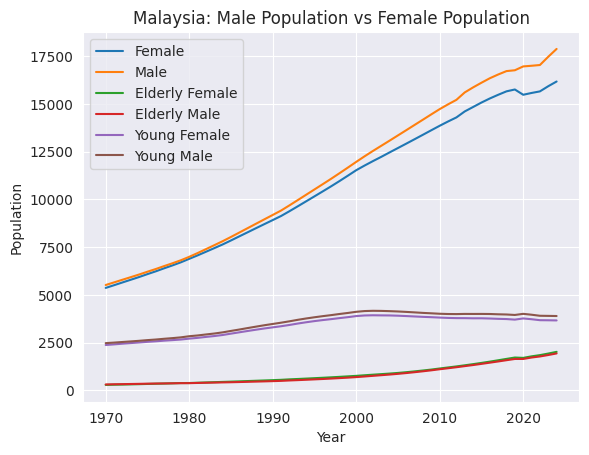

In [49]:
plt.plot(pop_df_yearly_sex_total_elderyoung['year'], pop_df_yearly_sex_total_elderyoung['female'])
plt.plot(pop_df_yearly_sex_total_elderyoung['year'], pop_df_yearly_sex_total_elderyoung['male'])
plt.plot(pop_df_yearly_sex_total_elderyoung['year'], pop_df_yearly_sex_total_elderyoung['elder_female'])
plt.plot(pop_df_yearly_sex_total_elderyoung['year'], pop_df_yearly_sex_total_elderyoung['elder_male'])
plt.plot(pop_df_yearly_sex_total_elderyoung['year'], pop_df_yearly_sex_total_elderyoung['young_female'])
plt.plot(pop_df_yearly_sex_total_elderyoung['year'], pop_df_yearly_sex_total_elderyoung['young_male'])


plt.xlabel('Year')
plt.ylabel('Population')

plt.title("Malaysia: Male Population vs Female Population")
plt.legend(['Female', 'Male', 'Elderly Female', 'Elderly Male', 'Young Female', 'Young Male']);

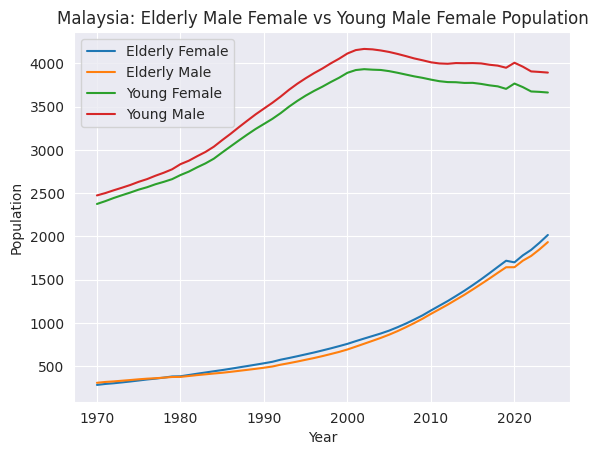

In [50]:
plt.plot(pop_df_yearly_sex_total_elderyoung['year'], pop_df_yearly_sex_total_elderyoung['elder_female'])
plt.plot(pop_df_yearly_sex_total_elderyoung['year'], pop_df_yearly_sex_total_elderyoung['elder_male'])
plt.plot(pop_df_yearly_sex_total_elderyoung['year'], pop_df_yearly_sex_total_elderyoung['young_female'])
plt.plot(pop_df_yearly_sex_total_elderyoung['year'], pop_df_yearly_sex_total_elderyoung['young_male'])

plt.xlabel('Year')
plt.ylabel('Population')

plt.title("Malaysia: Elderly Male Female vs Young Male Female Population")
plt.legend(['Elderly Female', 'Elderly Male', 'Young Female', 'Young Male']);

It can be seen that bumiputera population has increased steadily over the years. Chinese population increased slightly while Indian population increased minimally over the years as well.

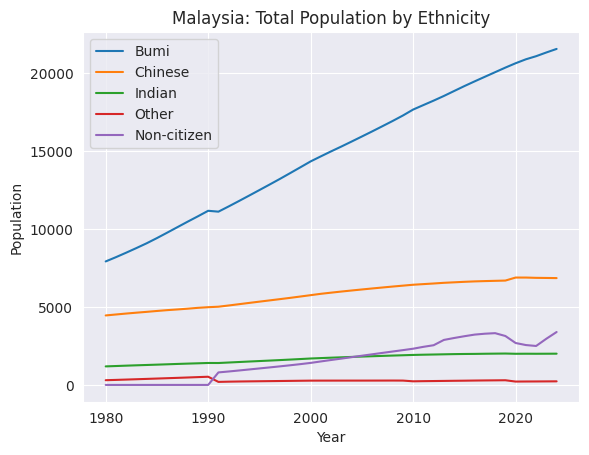

In [51]:
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['bumi'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['chinese'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['indian'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['other'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['non-citizen'])


plt.xlabel('Year')
plt.ylabel('Population')

plt.title("Malaysia: Total Population by Ethnicity")
plt.legend(['Bumi', 'Chinese', 'Indian', 'Other', 'Non-citizen']);

It is observed that most of the elderly population dropped around 2019 Covid-19 period except for Bumiputera whereby its growth remains steady. For young population, Chinese and Indian population has increased slightly before declining to a steady rate except for Bumiputera where it declines during the Covid-19 period to a steady rate.

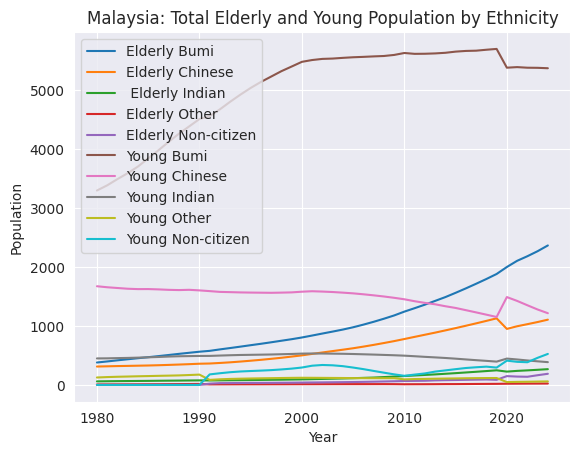

In [52]:
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['bumi_elder'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['chi_elder'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['ind_elder'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['otr_elder'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['non-citi_elder'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['bumi_young'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['chi_young'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['ind_young'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['otr_young'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['non-citi_young'])


plt.xlabel('Year')
plt.ylabel('Population')

plt.title("Malaysia: Total Elderly and Young Population by Ethnicity")
plt.legend(['Elderly Bumi', 'Elderly Chinese', ' Elderly Indian', 'Elderly Other', 'Elderly Non-citizen','Young Bumi', 'Young Chinese', 'Young Indian', 'Young Other', 'Young Non-citizen']);

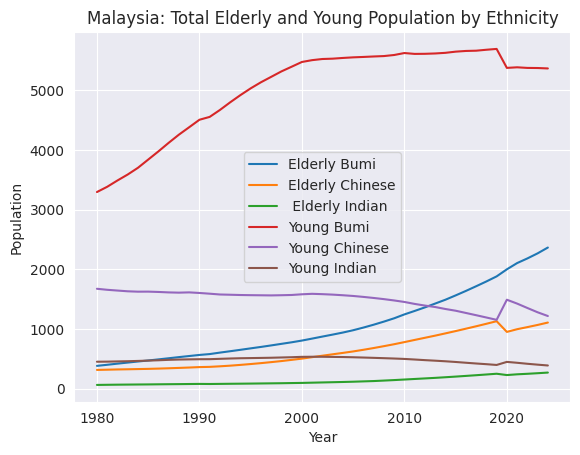

In [53]:
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['bumi_elder'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['chi_elder'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['ind_elder'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['bumi_young'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['chi_young'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['ind_young'])



plt.xlabel('Year')
plt.ylabel('Population')

plt.title("Malaysia: Total Elderly and Young Population by Ethnicity")
plt.legend(['Elderly Bumi', 'Elderly Chinese', ' Elderly Indian','Young Bumi', 'Young Chinese', 'Young Indian']);

Heatmap below shows the proportion of population based on age groups on each year. People aged between 25-59 is the most followed by 0-14, 15-24 and over 60.

In [54]:
pop_df_age_heatmap = pop_df_yearly_age.pivot_table(index='age', columns='year', values='population', aggfunc='sum')

pop_df_age_heatmap

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
age,,,,,,,,,,,,,,,,,,,,,
0-14,4847.4,4907.0,4975.1,5037.5,5100.4,5170.5,5229.0,5302.3,5365.1,5435.7,...,7775.8,7759.8,7728.2,7705.7,7652.5,7771.9,7685.1,7580.0,7569.2,7554.2
15-24,2119.2,2209.4,2298.8,2386.0,2472.0,2558.6,2631.5,2709.7,2783.0,2857.4,...,6072.2,6107.3,6115.9,6104.4,6038.7,5706.5,5693.7,5694.7,5816.1,5882.0
25-59,3323.6,3430.8,3540.6,3651.6,3765.8,3888.1,4025.2,4172.4,4316.8,4468.9,...,14516.5,14814.5,15091.9,15346.8,15470.4,15625.7,15698.8,15805.4,16240.4,16673.0
60+,591.6,612.4,626.7,644.6,663.1,683.0,702.1,716.8,735.3,756.1,...,2821.9,2952.1,3086.7,3225.3,3361.5,3343.3,3498.9,3618.0,3776.1,3949.9


<Axes: title={'center': 'Population (1000s)'}, xlabel='year', ylabel='age'>

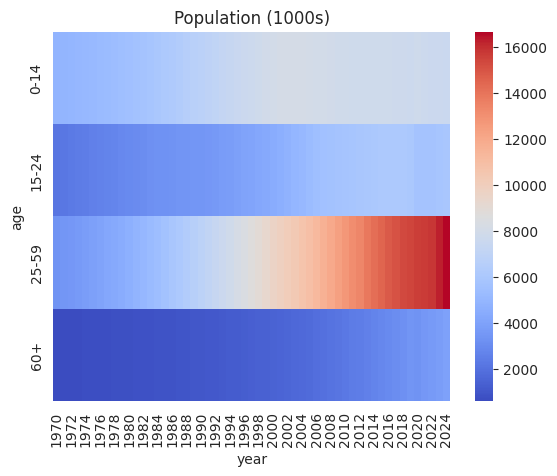

In [55]:
plt.title("Population (1000s)")
sns.heatmap(pop_df_age_heatmap, annot=False, fmt="d", cmap="coolwarm")

In [56]:
pop_df_sex_heatmap = pop_df_yearly_sex.pivot_table(index='sex', columns='year', values='population', aggfunc='sum')

pop_df_sex_heatmap

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
sex,,,,,,,,,,,,,,,,,,,,,
female,5364.7,5506.6,5649.8,5792.0,5935.1,6087.0,6233.8,6392.7,6544.5,6705.8,...,15074.3,15287.4,15479.8,15660.9,15757.9,15481.0,15576.0,15658.3,15929.6,16176.1
male,5517.1,5653.3,5791.4,5928.0,6066.3,6212.9,6354.5,6508.3,6655.8,6812.5,...,16112.2,16346.4,16542.7,16721.5,16764.9,16966.2,17000.5,17039.8,17472.4,17882.7


Heatmap below shows the male and female population over the years. There are more males than females by 2024.

<Axes: title={'center': 'Population (1000s)'}, xlabel='year', ylabel='sex'>

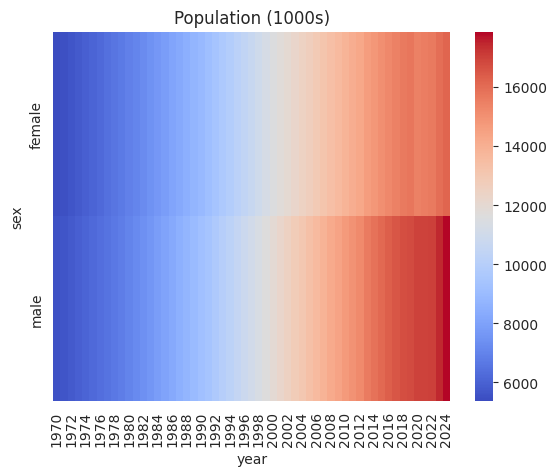

In [57]:
plt.title("Population (1000s)")
sns.heatmap(pop_df_sex_heatmap, annot=False, fmt="d", cmap="coolwarm")

In [58]:
pop_df_race_heatmap = pop_df_yearly_race.pivot_table(index='ethnicity', columns='year', values='population', aggfunc='sum')

pop_df_race_heatmap

year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
ethnicity,,,,,,,,,,,,,,,,,,,,,
bumi,7926.8,8200.5,8489.6,8786.7,9093.3,9425.6,9774.0,10127.9,10480.7,10824.6,...,19182.9,19485.2,19781.0,20075.3,20369.3,20649.5,20902.3,21101.7,21341.7,21569.0
chinese,4460.1,4521.2,4581.8,4637.9,4690.8,4747.2,4800.4,4845.1,4893.3,4948.2,...,6618.8,6645.8,6665.2,6682.2,6698.7,6892.5,6891.9,6873.8,6866.2,6857.6
indian,1189.7,1212.9,1236.6,1258.8,1279.8,1301.2,1323.6,1347.1,1368.2,1388.0,...,1986.2,1991.6,2001.0,2008.2,2014.6,1998.8,2002.4,1999.9,2002.6,2005.7
non-citizen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3125.9,3230.1,3287.5,3322.9,3140.1,2691.0,2559.6,2499.8,2964.9,3396.0
other,302.7,322.4,343.7,364.8,386.7,408.9,431.3,453.5,477.0,501.3,...,272.0,280.7,288.0,293.8,299.7,215.7,220.0,222.9,226.9,230.7


Heatmap below shows the proportion of population for different ethnicity over the years. Bumiputera remains the population with the highest count throughout followed up by chinese and indians. Since 1990, records of non-citizens are taken and there has been a steady increase in non-citizen population ever since.

<Axes: title={'center': 'Population (1000s)'}, xlabel='year', ylabel='ethnicity'>

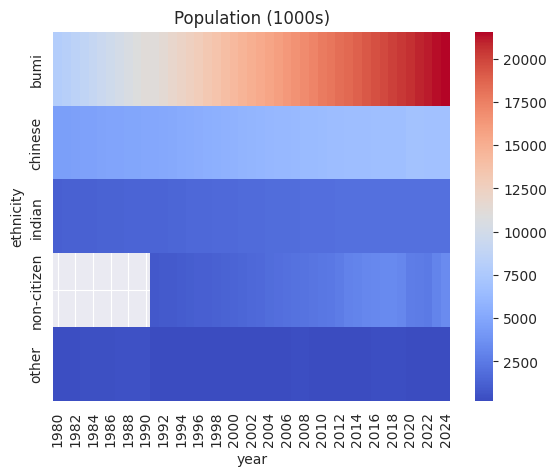

In [59]:
plt.title("Population (1000s)")
sns.heatmap(pop_df_race_heatmap, annot=False, fmt="d", cmap="coolwarm")

## Asking and Answering Questions

Q: Which ethnicity has the highest elder to total ratio?

In [60]:
pop_df_elder_ratio = pop_df_yearly_race_total_elderyoung[['year','elder_bumi_ratio (%)','elder_chi_ratio (%)','elder_ind_ratio (%)','elder_other_ratio (%)']]

pop_df_elder_ratio.sort_values(by='year', ascending=False).head()

ethnicity,year,elder_bumi_ratio (%),elder_chi_ratio (%),elder_ind_ratio (%),elder_other_ratio (%)
44,2024,10.96,16.13,13.32,10.23
43,2023,10.62,15.53,12.81,10.05
42,2022,10.34,14.98,12.34,10.05
41,2021,10.06,14.43,11.88,9.77
40,2020,9.68,13.77,11.29,9.55


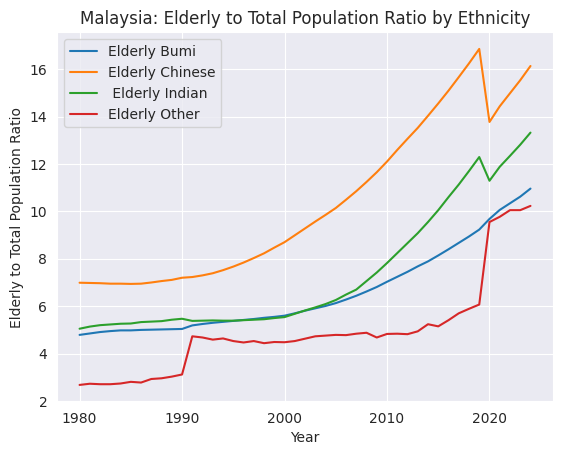

In [61]:
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['elder_bumi_ratio (%)'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['elder_chi_ratio (%)'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['elder_ind_ratio (%)'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['elder_other_ratio (%)'])

plt.xlabel('Year')
plt.ylabel('Elderly to Total Population Ratio')

plt.title("Malaysia: Elderly to Total Population Ratio by Ethnicity")
plt.legend(['Elderly Bumi', 'Elderly Chinese', ' Elderly Indian', 'Elderly Other']);

Q: Which ethnicity has the lowest young to total ratio?

In [62]:
pop_df_young_ratio = pop_df_yearly_race_total_elderyoung[['year','young_bumi_ratio (%)','young_chi_ratio (%)','young_ind_ratio (%)','young_other_ratio (%)']]

pop_df_young_ratio.sort_values(by='year', ascending=False).head()

ethnicity,year,young_bumi_ratio (%),young_chi_ratio (%),young_ind_ratio (%),young_other_ratio (%)
44,2024,24.89,17.72,19.26,25.88
43,2023,25.18,18.62,19.97,25.12
42,2022,25.48,19.65,20.74,24.19
41,2021,25.77,20.66,21.54,23.53
40,2020,26.04,21.60,22.33,22.36


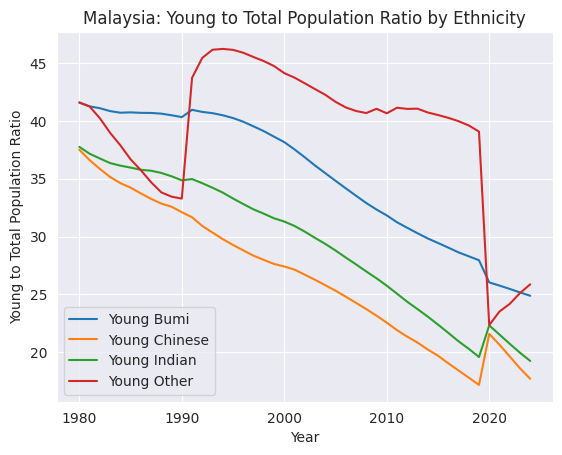

In [63]:
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['young_bumi_ratio (%)'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['young_chi_ratio (%)'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['young_ind_ratio (%)'])
plt.plot(pop_df_yearly_race_total_elderyoung['year'], pop_df_yearly_race_total_elderyoung['young_other_ratio (%)'])

plt.xlabel('Year')
plt.ylabel('Young to Total Population Ratio')

plt.title("Malaysia: Young to Total Population Ratio by Ethnicity")
plt.legend(['Young Bumi', 'Young Chinese', 'Young Indian', 'Young Other']);

Q: Which gender has the highest elder to total ratio?

In [64]:
pop_df_sex_ratio = pop_df_yearly_sex_total_elderyoung[['year','elder_female_ratio (%)','elder_male_ratio (%)','young_female_ratio (%)','young_male_ratio (%)']]

pop_df_sex_ratio.sort_values(by='year', ascending=False).head()

sex,year,elder_female_ratio (%),elder_male_ratio (%),young_female_ratio (%),young_male_ratio (%)
54,2024,12.46,10.81,22.64,21.77
53,2023,12.09,10.59,23.04,22.32
52,2022,11.78,10.41,23.46,22.92
51,2021,11.43,10.11,23.91,23.30
50,2020,10.98,9.69,24.32,23.61


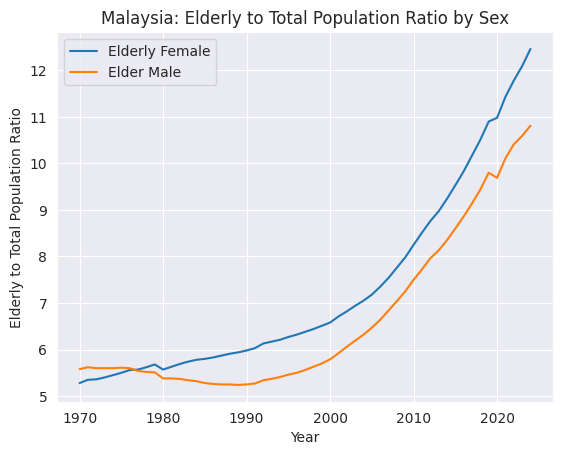

In [65]:
plt.plot(pop_df_yearly_sex_total_elderyoung['year'], pop_df_yearly_sex_total_elderyoung['elder_female_ratio (%)'])
plt.plot(pop_df_yearly_sex_total_elderyoung['year'], pop_df_yearly_sex_total_elderyoung['elder_male_ratio (%)'])

plt.xlabel('Year')
plt.ylabel('Elderly to Total Population Ratio')

plt.title("Malaysia: Elderly to Total Population Ratio by Sex")
plt.legend(['Elderly Female', 'Elder Male']);

Q: Which gender has the lowest young to total ratio?

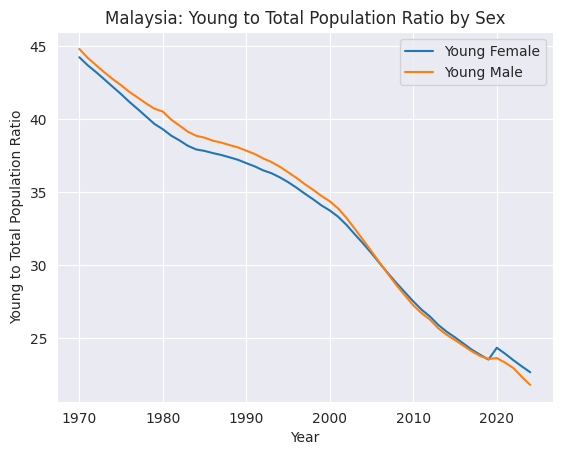

In [66]:
plt.plot(pop_df_yearly_sex_total_elderyoung['year'], pop_df_yearly_sex_total_elderyoung['young_female_ratio (%)'])
plt.plot(pop_df_yearly_sex_total_elderyoung['year'], pop_df_yearly_sex_total_elderyoung['young_male_ratio (%)'])

plt.xlabel('Year')
plt.ylabel('Young to Total Population Ratio')

plt.title("Malaysia: Young to Total Population Ratio by Sex")
plt.legend(['Young Female', 'Young Male']);

## Inferences and Conclusion

Some interesting inferences from the dataset, here presents the summary for few of them:

*   Based on the demographics of the dataset, it can be inferred that the dataset can represent the overall population of Malaysia, although non-citizens are also included into the dataset and the ethnicity under 'other' groupings did not specify their specific ethnicity.
*   Overall, population of Malaysia is steadily increasing over the years. A large contributor to it has to be from Bumiputera as they are also the majority of the citizens of Malaysia.
*   Although population has steadily increased over the years, it is accompanied by increasing percentage of elderly to total population ratio as well as decreasing percentage of young to total population ratio.
*   Intially, male and female population are similar as of record at 1970. However, over the years, male has overtaken female population by a few million difference at the year 2024.
*   It can be observed that the population slightly increased in some cases during the Covid-19 period starting at 2019 before declining to a steadier rate.
*   It can also be observed that Chinese has both the highest elderly to total population ratio and lowest young to total population ratio, indicating that Chinese population is slowly turning into an aging population. For genders, male has the lowest young to total population ratio while female has the highest elderly to total population ratio.






## References and Future Work

Some ideas for future work:

*   Repeating the data analysis on different age groups and comparing the results
*   Incorporating state level population data to look into state-specific information to determine which state has higher chance of transitioning into an aging population.
*   Incorporating more datasets featuring healthcare infrastructures, fertility rates, birth rates etc to learn about Malaysia's capability and capacity to handle a growing aging population.
*   Including machine-learning procedures and methods to allow predicitive measures to be included in the data analysis studies.





References:

*   Population Table: Malaysia: https://data.gov.my/data-catalogue/population_malaysia
*   Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
*   Matplotlib user guide: https://matplotlib.org/stable/users/index.html
*   Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
*   Numpy user guide: https://numpy.org/doc/stable/user/





